<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Week 19 Lab</h1>
</div>

For this lab, we'll be using the `flights.txt` file located in `/datasets`.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1**

Open `../datasets/flights.txt`. Use the methods we've learned in class to analyze the dataset from the top-level (see how many rows it has, how many null values, what columns are necessary, etc.).

**a.** read the file into a dataframe (hint: as a csv)

In [16]:

flights = pd.read_csv('flights.txt', delimiter='|')
flights.head()
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      100000 non-null  int64  
 1   Unnamed: 0.1    100000 non-null  int64  
 2   year            100000 non-null  int64  
 3   month           100000 non-null  int64  
 4   day             100000 non-null  int64  
 5   dep_time        98106 non-null   float64
 6   sched_dep_time  100000 non-null  int64  
 7   dep_delay       98106 non-null   float64
 8   arr_time        98036 non-null   float64
 9   sched_arr_time  100000 non-null  int64  
 10  arr_delay       97854 non-null   float64
 11  carrier         100000 non-null  object 
 12  flight          100000 non-null  int64  
 13  tailnum         99453 non-null   object 
 14  origin          100000 non-null  object 
 15  dest            100000 non-null  object 
 16  air_time        97854 non-null   float64
 17  distance   

**b.** Find the memory usage programmatically (hint: use `help`)

In [17]:
mem_usage = flights.memory_usage().sum()/1000000
print(round(mem_usage,2))

16.8


**c.** Find the number of missing entries for each column.

In [18]:
flights.isnull().sum()

Unnamed: 0           0
Unnamed: 0.1         0
year                 0
month                0
day                  0
dep_time          1894
sched_dep_time       0
dep_delay         1894
arr_time          1964
sched_arr_time       0
arr_delay         2146
carrier              0
flight               0
tailnum            547
origin               0
dest                 0
air_time          2146
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [19]:
# Calculate the percentage of missing values in dataset

total_missing = flights.isnull().sum().sum()
print(total_missing)
total_cells = np.product(flights.shape)
print(total_cells)
percent_missing = (total_missing/total_cells)*100
print(f"{round(percent_missing,2)}%")

10591
2100000
0.5%


**d.** What columns are unnecessary? Remove them so that the `df` doesn't include them.

In [20]:
df = flights.drop(columns=['Unnamed: 0','Unnamed: 0.1']) # Removing unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            100000 non-null  int64  
 1   month           100000 non-null  int64  
 2   day             100000 non-null  int64  
 3   dep_time        98106 non-null   float64
 4   sched_dep_time  100000 non-null  int64  
 5   dep_delay       98106 non-null   float64
 6   arr_time        98036 non-null   float64
 7   sched_arr_time  100000 non-null  int64  
 8   arr_delay       97854 non-null   float64
 9   carrier         100000 non-null  object 
 10  flight          100000 non-null  int64  
 11  tailnum         99453 non-null   object 
 12  origin          100000 non-null  object 
 13  dest            100000 non-null  object 
 14  air_time        97854 non-null   float64
 15  distance        100000 non-null  int64  
 16  hour            100000 non-null  int64  
 17  minute     

**e.** Carrier/airline information is located below. Use the information in there to create a new column with a human-readable airline name.

```
"9E" "Endeavor Air Inc.",
"AA" "American Airlines Inc.",
"AS" "Alaska Airlines Inc.",
"B6" "JetBlue Airways",
"DL" "Delta Air Lines Inc.",
"EV" "ExpressJet Airlines Inc.",
"F9" "Frontier Airlines Inc.",
"FL" "AirTran Airways Corporation",
"HA" "Hawaiian Airlines Inc.",
"MQ" "Envoy Air",
"OO" "SkyWest Airlines Inc.",
"UA" "United Air Lines Inc.",
"US" "US Airways Inc.",
"VX" "Virgin America",
"WN" "Southwest Airlines Co.",
"YV" "Mesa Airlines Inc.",

```

In [21]:
at = df.sort_values(by='carrier')
at.carrier.unique()

array(['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO',
       'UA', 'US', 'VX', 'WN', 'YV'], dtype=object)

In [22]:
dct = {
"9E": "Endeavor Air Inc.",
"AA":"American Airlines Inc.",
"AS":"Alaska Airlines Inc.",
"B6":"JetBlue Airways",
"DL":"Delta Air Lines Inc.",
"EV":"ExpressJet Airlines Inc.",
"F9":"Frontier Airlines Inc.",
"FL":"AirTran Airways Corporation",
"HA":"Hawaiian Airlines Inc.",
"MQ":"Envoy Air",
"OO":"SkyWest Airlines Inc.",
"UA":"United Air Lines Inc.",
"US":"US Airways Inc.",
"VX":"Virgin America",
"WN":"Southwest Airlines Co.",
"YV":"Mesa Airlines Inc."
    }
#creating new column with airline names
df["airline"]=df["carrier"].map(dct)
df.airline.head()

0     United Air Lines Inc.
1     United Air Lines Inc.
2    American Airlines Inc.
3           JetBlue Airways
4      Delta Air Lines Inc.
Name: airline, dtype: object

**Part 2** 

Now we need to fix the missing rows and values.



**a.** Check out the rows missing values for "dep_delay". Can we keep them? If not, remove those rows.

(note: we're only interested in rows with flight time information)

In [23]:
#dep_delay  missing 1894

#We want to keep air time
df2 = df[df.dep_delay.notnull() & df.air_time.notnull()]
df2 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013,12,19,814.0,817,-3.0,920.0,931,-11.0,EV,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z,ExpressJet Airlines Inc.
99996,2013,12,19,815.0,810,5.0,1033.0,1047,-14.0,9E,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z,Endeavor Air Inc.
99997,2013,12,19,815.0,815,0.0,1117.0,1123,-6.0,B6,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z,JetBlue Airways
99998,2013,12,19,815.0,749,26.0,1113.0,1103,10.0,UA,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z,United Air Lines Inc.


In [24]:
df1 = df.dropna(subset= \
                ['dep_time','sched_dep_time','arr_time','sched_arr_time','dep_delay','air_time'])
df1
#df.info()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,airline
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,Delta Air Lines Inc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013,12,19,814.0,817,-3.0,920.0,931,-11.0,EV,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z,ExpressJet Airlines Inc.
99996,2013,12,19,815.0,810,5.0,1033.0,1047,-14.0,9E,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z,Endeavor Air Inc.
99997,2013,12,19,815.0,815,0.0,1117.0,1123,-6.0,B6,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z,JetBlue Airways
99998,2013,12,19,815.0,749,26.0,1113.0,1103,10.0,UA,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z,United Air Lines Inc.


**b.** Now check out the rows missing "arr_time". Can we keep them? Drop them if not.

In [25]:
#now they are not missing values
#df1[df1.arr_time.isnull()]
df1.arr_time.isnull().sum()

0

**c.** Now let's check out the rows missing `air_time`. Can we keep them? Drop them if not.

In [26]:
#now they are not missing values
df1[df1.air_time.isnull()]
df1.air_time.isnull().sum()

0

**Part 3**

Making observations of what we have.

**a.** What flight was the longest? Where did it leave from and where did it land?

You might need to look up airport codes.

In [30]:
## Key variable: origin, dest, air_time

# For this we may need a pivot table to find the longest 

'''
table = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],
                    aggfunc={'D': np.mean,
                             'E': [min, max, np.mean]})
'''

# longest_flight = pd.pivot_table(df1, values=['air_time'], index=['origin','dest'],\
#                                 aggfunc={'air_time': [max]})

"\ntable = pd.pivot_table(df, values=['D', 'E'], index=['A', 'C'],\n                    aggfunc={'D': np.mean,\n                             'E': [min, max, np.mean]})\n"

In [31]:
df1.groupby(['origin','dest']).air_time.agg([max]).sort_values(by=['max']\
                                                               ,ascending=False).iloc[:1]

,,max
origin,dest,
EWR,HNL,676.0


In [49]:
longest_flight = pd.pivot_table(df1, values=['air_time'], index=['origin','dest'],\
                                aggfunc={'air_time': [max]})
longest_flight #not sure how to sort a pandas pi

air_time
                 max
origin dest         
EWR    ALB      45.0
       ATL     151.0
       AUS     268.0
       AVL     111.0
       BDL      31.0
...              ...
LGA    STL     181.0
       SYR      47.0
       TPA     189.0
       TYS     131.0
       XNA     236.0

[211 rows x 1 columns]

**b.** What flight was the shortest?

In [ ]:
df1.groupby(['origin','dest']).air_time.agg([min]).sort_values(by=['min']\
                                                               ,ascending=True).iloc[:1]


**c.** What airline flied the most during this period?

hint: `.size()`

In [80]:
df1.groupby('airline').air_time.size().sort_values(ascending=False).iloc[:1]

airline
United Air Lines Inc.    17353
Name: air_time, dtype: int64

**d.** Which destination was most flown to?

In [102]:
## dest, which destination was flown the most. Then need number of flights or arrivals
#df1.groupby('airline').d.sum().sort_values(ascending=False).iloc[:1]

df1.groupby(['dest']).dest.count().sort_values(ascending=False).iloc[:1]

dest
ATL    5036
Name: dest, dtype: int64

**e.** Which location was flown from the most?

In [96]:
df1.groupby(['origin']).origin.count().sort_values(ascending=False).iloc[:1]
#lights[flights["dep_delay"]== flights["dep_delay"].max()][["flight","dep_delay","airline_name"]]

origin
EWR    34766
Name: origin, dtype: int64

**f.** Which flight had the longest departure delay?

In [98]:
df1.groupby(['airline','flight']).dep_delay.max().sort_values(ascending=False).iloc[:1]

airline                 flight
Hawaiian Airlines Inc.  51        1301.0
Name: dep_delay, dtype: float64

**g.** Which flight had the longest arrival delay? Should match the previous.

In [63]:
#df1.groupby(['airline']).arr_delay.max().sort_values(ascending=False).iloc[:1]
df1[df1["arr_delay"] == df1["arr_delay"].max()][["flight","arr_delay","airline"]]

,flight,arr_delay,airline
7072,51,1272.0,Hawaiian Airlines Inc.


**h.** Which airline had the longest arrival delays on average?

In [55]:
#df1.groupby(['airline','flight']).arr_delay.mean().sort_values(ascending=False).iloc[:1]
df1.groupby(['airline']).arr_delay.agg(np.mean).sort_values(ascending=False).iloc[:1]

airline
Frontier Airlines Inc.    20.584906
Name: arr_delay, dtype: float64

**i.** Which airline had the longest departure delays on average?

In [81]:
df1.groupby(['airline','flight']).dep_delay.agg(np.mean).sort_values(ascending=False).iloc[:1]

airline               flight
Delta Air Lines Inc.  1223      849.0
Name: dep_delay, dtype: float64

**j.** Which aircraft (going by tailnumber) flew the most?

In [88]:
df1.groupby(['tailnum']).tailnum.count().sort_values(ascending=False).iloc[:1]

tailnum
N0EGMQ    149
Name: tailnum, dtype: int64

**Bonus:** What day had the most flights?

In [89]:
'''
df['name'].str.split('(',-1, False).str[1].str.split(')',3).str[-2]

# new data frame with split value columns 
#data["Team"]= data["Team"].str.split("t", n = 1, expand = True) 
'''
print(df1["day"].value_counts().to_frame().iloc[0])

#before data cleaning
flights["day"].value_counts().to_frame().iloc[0]
#df1.groupby('day').day.count().sort_values(ascending=False).iloc[:1]
#df1["flight_date"]= df1["time_hour"].str.split('T').str[0]
#flights["date"] = df1["day"+]
#df1["date"] = pd.concat(df1['year', 'month', 'day'], ignore_index=True)

day    3813
Name: 18, dtype: int64


day    3858
Name: 11, dtype: int64

**Part 4**

Using one (or more) of the exercises from **Part 3**, plot the information in a matplotlib chart that has correct ticks, labels, titles and axis. Also ensure that the chart type that you use is the correct one for plotting the data you're using. Create a chart you would proudly show an employer.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
#sns.lineplot(data=df.set_index('ObservationDate').resample('D').sum()[['Confirmed','Deaths','Recovered']])
sns.lineplot(data=df1.set_index('dep_delay').resample('D').mean()[['airline','fligh','origin']])#df.set_index('ObservationDate').resample('D').sum()[['Confirmed']]['Confirmed'].values
#df1.groupby(['airline','flight']).dep_delay.agg(np.mean).sort_values(ascending=False).iloc[:1]

In [ ]:
'''
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()
df2.plot.barh(stacked=True);
'''

df1.plot.barh(stacked=True);
df1.plot.show()
# data1 = df1.groupby(['airline','flight']).dep_delay.agg(np.mean).astype(int).sort_values(ascending=False).iloc[:20]
# data1

In [ ]:
data=df1.groupby('airline').air_time.sum().sort_values(ascending=False).astype(int).iloc[:10]

In [69]:
in_avg = df1[["dest"]].groupby("dest").size().mean()
dest = tuple([i for i in df1["dest"].value_counts().keys()])[:12]
visits =  tuple([i for i in df1["dest"].value_counts()])[:12]



Text(0, 0.5, 'Delay in hrs')

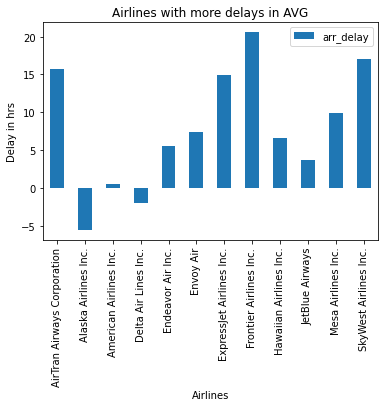

In [91]:
df1.groupby(["airline"])["arr_delay"].mean().to_frame().iloc[:12].plot.bar()
plt.title('Airlines with more delays in AVG')
plt.xlabel('Airlines')
plt.ylabel('Delay in hrs')

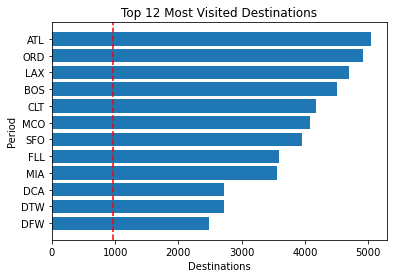

In [71]:
fig, ax = plt.subplots()
y_pos = np.arange(len(dest))

ax.barh(y_pos,visits,align='center')
ax.axvline(in_avg, ls='--', color='r')
ax.set_yticks(y_pos)
ax.set_yticklabels(dest)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Destinations')
ax.set_ylabel('Period')
ax.set_title('Top 12 Most Visited Destinations')

plt.show()